In [18]:
import pandas as pd
full = pd.read_csv("DataPreparation/Pokemon_mod_v1.csv")
print(full['Total'].max())
print(full['Total Attack'].max())
print(full['Total Defense'].max())

780
510
480


In [19]:
fire_full = pd.read_csv("DataPreparation/Fire.csv")
cols = list(fire_full.columns)
fire = fire_full[cols[1:2] + cols[3:6] + [cols[12]]]
fire.head(2)

,Name,Total,Total Attack,Total Defense,Generation
0,Charmander,309,177,132,1
1,Charmeleon,405,224,181,1


In [20]:
grass_full = pd.read_csv("DataPreparation/Grass.csv")
cols = list(grass_full.columns)
grass = grass_full[cols[1:2] + cols[3:6] + [cols[12]]]
grass.head(2)

,Name,Total,Total Attack,Total Defense,Generation
0,Bulbasaur,318,159,159,1
1,Ivysaur,405,202,203,1


In [21]:
water_full = pd.read_csv("DataPreparation/Water.csv")
cols = list(water_full.columns)
water = water_full[cols[1:2] + cols[3:6] + [cols[12]]]
water.head(2)

,Name,Total,Total Attack,Total Defense,Generation
0,Squirtle,314,141,173,1
1,Wartortle,405,186,219,1


In [22]:
fire_count = len(fire)
print(fire_count)
grass_count = len(grass)
print(grass_count)
water_count = len(water)
print(water_count)

64
95
126


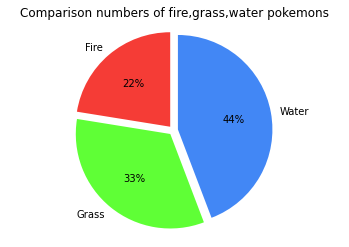

In [23]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Fire','Grass','Water']
values = np.array([fire_count,grass_count,water_count])
# values_sum = values.sum()
# sizes = np.array([])
# for v in values:
#     sizes = np.append(sizes,int((v/values_sum)*100))
explode = (0.05,0.05,0.05)
colors = ['#f53c36','#5fff36','#4287f5']
# fg,ax = plt.subplots()
plt.pie(values, explode=explode, labels=labels, autopct='%1.f%%',
        shadow=False, startangle=90, colors=colors)
plt.axis('equal') 
plt.title('Comparison numbers of fire,grass,water pokemons')
plt.savefig('Fire_Grass_Water_number.png')
plt.show()

In [24]:
fire_average = fire.groupby(['Generation']).mean()
grass_average = grass.groupby(['Generation']).mean()
water_average = water.groupby(['Generation']).mean()
print(fire_average)
print(grass_average)
print(water_average)

                 Total  Total Attack  Total Defense
Generation                                         
1           481.071429    268.071429     213.000000
2           451.181818    244.727273     206.454545
3           493.333333    266.666667     226.666667
4           484.666667    264.333333     220.333333
5           452.625000    235.812500     216.812500
6           450.875000    244.750000     206.125000
                 Total  Total Attack  Total Defense
Generation                                         
1           415.200000    210.333333     204.866667
2           399.300000    190.300000     209.000000
3           401.666667    210.888889     190.777778
4           461.647059    228.882353     232.764706
5           408.800000    198.650000     210.150000
6           415.200000    197.200000     218.000000
                 Total  Total Attack  Total Defense
Generation                                         
1           430.685714    210.857143     219.828571
2           

In [25]:
total_data = [fire_average['Total'],grass_average['Total'],water_average['Total']]
total_attack_data = [fire['Total Attack'],grass['Total Attack'],water['Total Attack']]

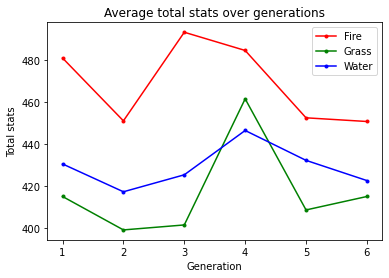

In [32]:
generation = fire['Generation'].unique()
colors = ['r','g','b']
for typ,color,total in zip(labels,colors,total_data):
    plt.plot(generation,total,"{}.-".format(color),label=typ)
plt.title('Average total stats over generations')
plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(generation)
plt.xlabel('Generation')
plt.ylabel('Total stats')
plt.savefig('Fire_Grass_Water_total_stats.pdf')
plt.show()

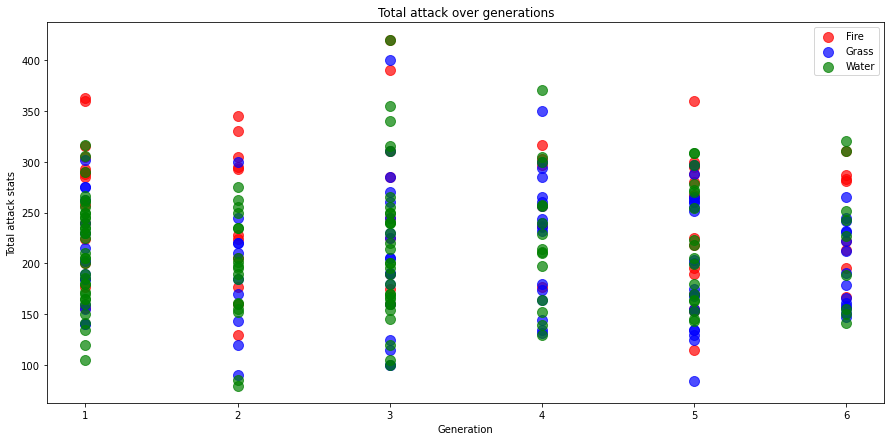

In [31]:
plt.figure(figsize=(15, 7))
generation_1 = [fire['Generation'],grass['Generation'],water['Generation']]
for gen,typ,color,total in zip(generation_1,labels,colors,total_attack_data):
    plt.scatter(gen,total,100,alpha=0.7,c=color,label=typ)
plt.title('Total attack over generations')
plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(generation)
plt.xlabel('Generation')
plt.ylabel('Total attack stats')
plt.savefig('Fire_Grass_Water_total_attack.pdf')
plt.show()

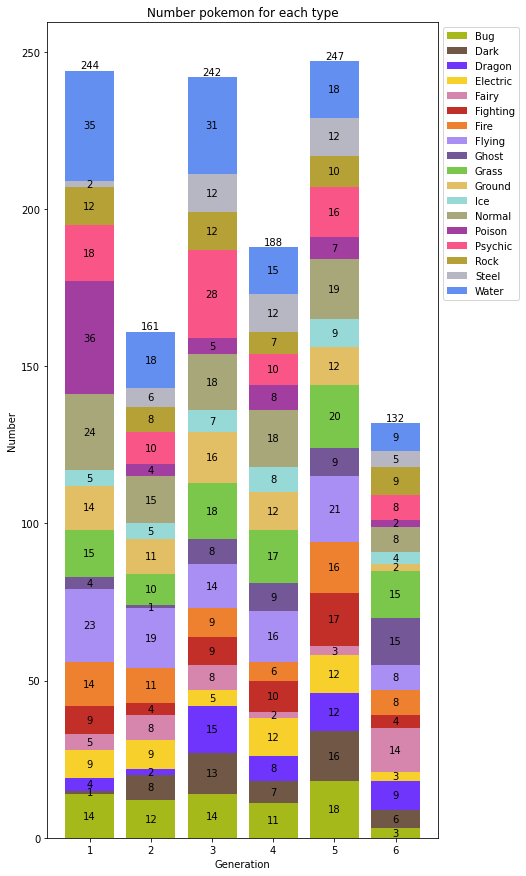

In [28]:

Types = full['Type'].unique()
Types.sort()
colors = ["#a6b91a","#705746","#6f35fc","#f7d02c","#d685ad","#c22e28","#ee8130","#a98ff3","#735797","#7ac74c","#e2bf65","#96d9d6","#a8a77a","#a33ea1","#f95587","#b6a136","#b7b7c3","#6390f0"]
results= np.array([],dtype="int32")


for typ in Types:
    result = np.array(full.loc[full['Type']==typ].groupby(['Generation']).count()['Name'])
    results = np.append(results,result)
data = results.reshape((len(Types),6))
X = np.arange(data.shape[1]) + 1

# fig = plt.figure(figsize=(7, 15))
# ax = fig.add_subplot(111)
plt.figure(figsize=(7, 15))
for i in range(data.shape[0]):
    p = plt.bar(X, data[i],bottom = np.sum(data[:i],axis =0),label=Types[i],color=colors[i])
    plt.bar_label(p, label_type='center')
plt.bar_label(p)
 
plt.ylabel('Number')
plt.xlabel('Generation')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Number pokemon for each type')
plt.savefig('Number_pokemon_for_each_type.pdf')
plt.show()


In [29]:
for typ in Types:
    result = full.loc[full['Type']==typ].groupby(['Generation']).count()['Name']
#     print(typ)
#     print(result)